In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
nfl2019_class_final = pd.read_csv('../Data/nfl2019_class_final.csv')

In [3]:
nfl2019_class_final.set_index('name', inplace=True)

In [4]:
nfl2019_class_final.shape

(25, 16)

In [5]:
nfl2018_class_final = pd.read_csv('../Data/nfl2018_class_final.csv')

In [6]:
nfl2018_class_final.set_index('name', inplace=True)

In [7]:
nfl2018_class_final.shape

(29, 16)

In [8]:
nfl2017_class_final = pd.read_csv('../Data/nfl2017_class_final.csv')

In [9]:
nfl2017_class_final.set_index('name', inplace=True)

In [10]:
nfl2017_class_final.shape

(20, 16)

In [11]:
df = [nfl2019_class_final, nfl2018_class_final, nfl2017_class_final]

In [12]:
df = pd.concat(df)

In [13]:
df['worth'].value_counts(normalize=True)

0    0.702703
1    0.297297
Name: worth, dtype: float64

In [14]:
X = df.drop(columns='worth')
y = df['worth']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=42)

## Log Reg

In [65]:
lr = LogisticRegression(solver='liblinear',random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
print(lr.score(X_train, y_train))
lr.score(X_test, y_test)

0.7636363636363637


0.6842105263157895

In [18]:
y_preds_train = lr.predict(X_train)
y_preds_test = lr.predict(X_test)

In [19]:
train_f1 = metrics.f1_score(y_train, y_preds_train)
test_f1 = metrics.f1_score(y_test, y_preds_test)
print(f'train:{train_f1}, test:{test_f1}')

train:0.5185185185185185, test:0.25


In [20]:
# Generate confusion matrix.
# Documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# tn, fp  positive = worth draft pick
# fn, tp  negative = not worth draft pick
confusion_matrix(y_test, # True values.
                 y_preds_test)  # Predicted values.

array([[12,  2],
       [ 4,  1]])

In [21]:
lr.intercept_

array([-0.07500516])

In [22]:
lr.coef_

array([[-1.60022495e-01,  8.85224334e-04,  9.85182103e-04,
        -2.67065907e-02, -1.28326779e-02, -7.95726899e-02,
        -1.53448209e-02,  1.65622711e-01,  5.92130255e-01,
         9.03730561e-02,  1.22849085e-01, -1.49666028e-02,
         1.39123219e+00,  5.59623817e-01, -1.98456437e-01]])

In [23]:
X.columns

Index(['games_played', 'rec_col', 'rec_yds_col', 'ypr_col', 'rec_td_col',
       'rush_attempts', 'rush_yds', 'ypc', 'rush_td', 'age_x', 'taller_six',
       'weight', 'drafted', 'invited', 'power_five'],
      dtype='object')

In [24]:
np.exp(lr.coef_)

array([[0.85212462, 1.00088562, 1.00098567, 0.97364688, 0.98724931,
        0.92351089, 0.98477231, 1.18012777, 1.80783547, 1.09458255,
        1.13071377, 0.98514484, 4.01980014, 1.75001405, 0.81999549]])

In [25]:
coef_dict = {'features':X.columns,
              'exp_coef_weights':[0.85212462, 1.00088562, 1.00098567, 0.97364688, 0.98724931,
        0.92351089, 0.98477231, 1.18012777, 1.80783547, 1.09458255,
        1.13071377, 0.98514484, 4.01980014, 1.75001405, 0.81999549]}

In [26]:
coef_df = pd.DataFrame(coef_dict)

In [27]:
coef_df.sort_values('exp_coef_weights', inplace=True)

In [28]:
below_coef_df = coef_df[coef_df['exp_coef_weights']<1]

In [29]:
below_coef_df['exp_coef_weights'] = below_coef_df['exp_coef_weights']-1

/Users/joshuakong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
above_coef_df = coef_df[coef_df['exp_coef_weights']>1]

In [31]:
above_coef_df['exp_coef_weights'] = above_coef_df['exp_coef_weights'] - 1

/Users/joshuakong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


15% decrease in the likelihood. 3(300%) times, 75%

As {features} increases by 1, someone is about 18% less likely to be worth the draft pick

As {features} increases by 1, someone is about 9.04 times as likely to be worth the draft pick

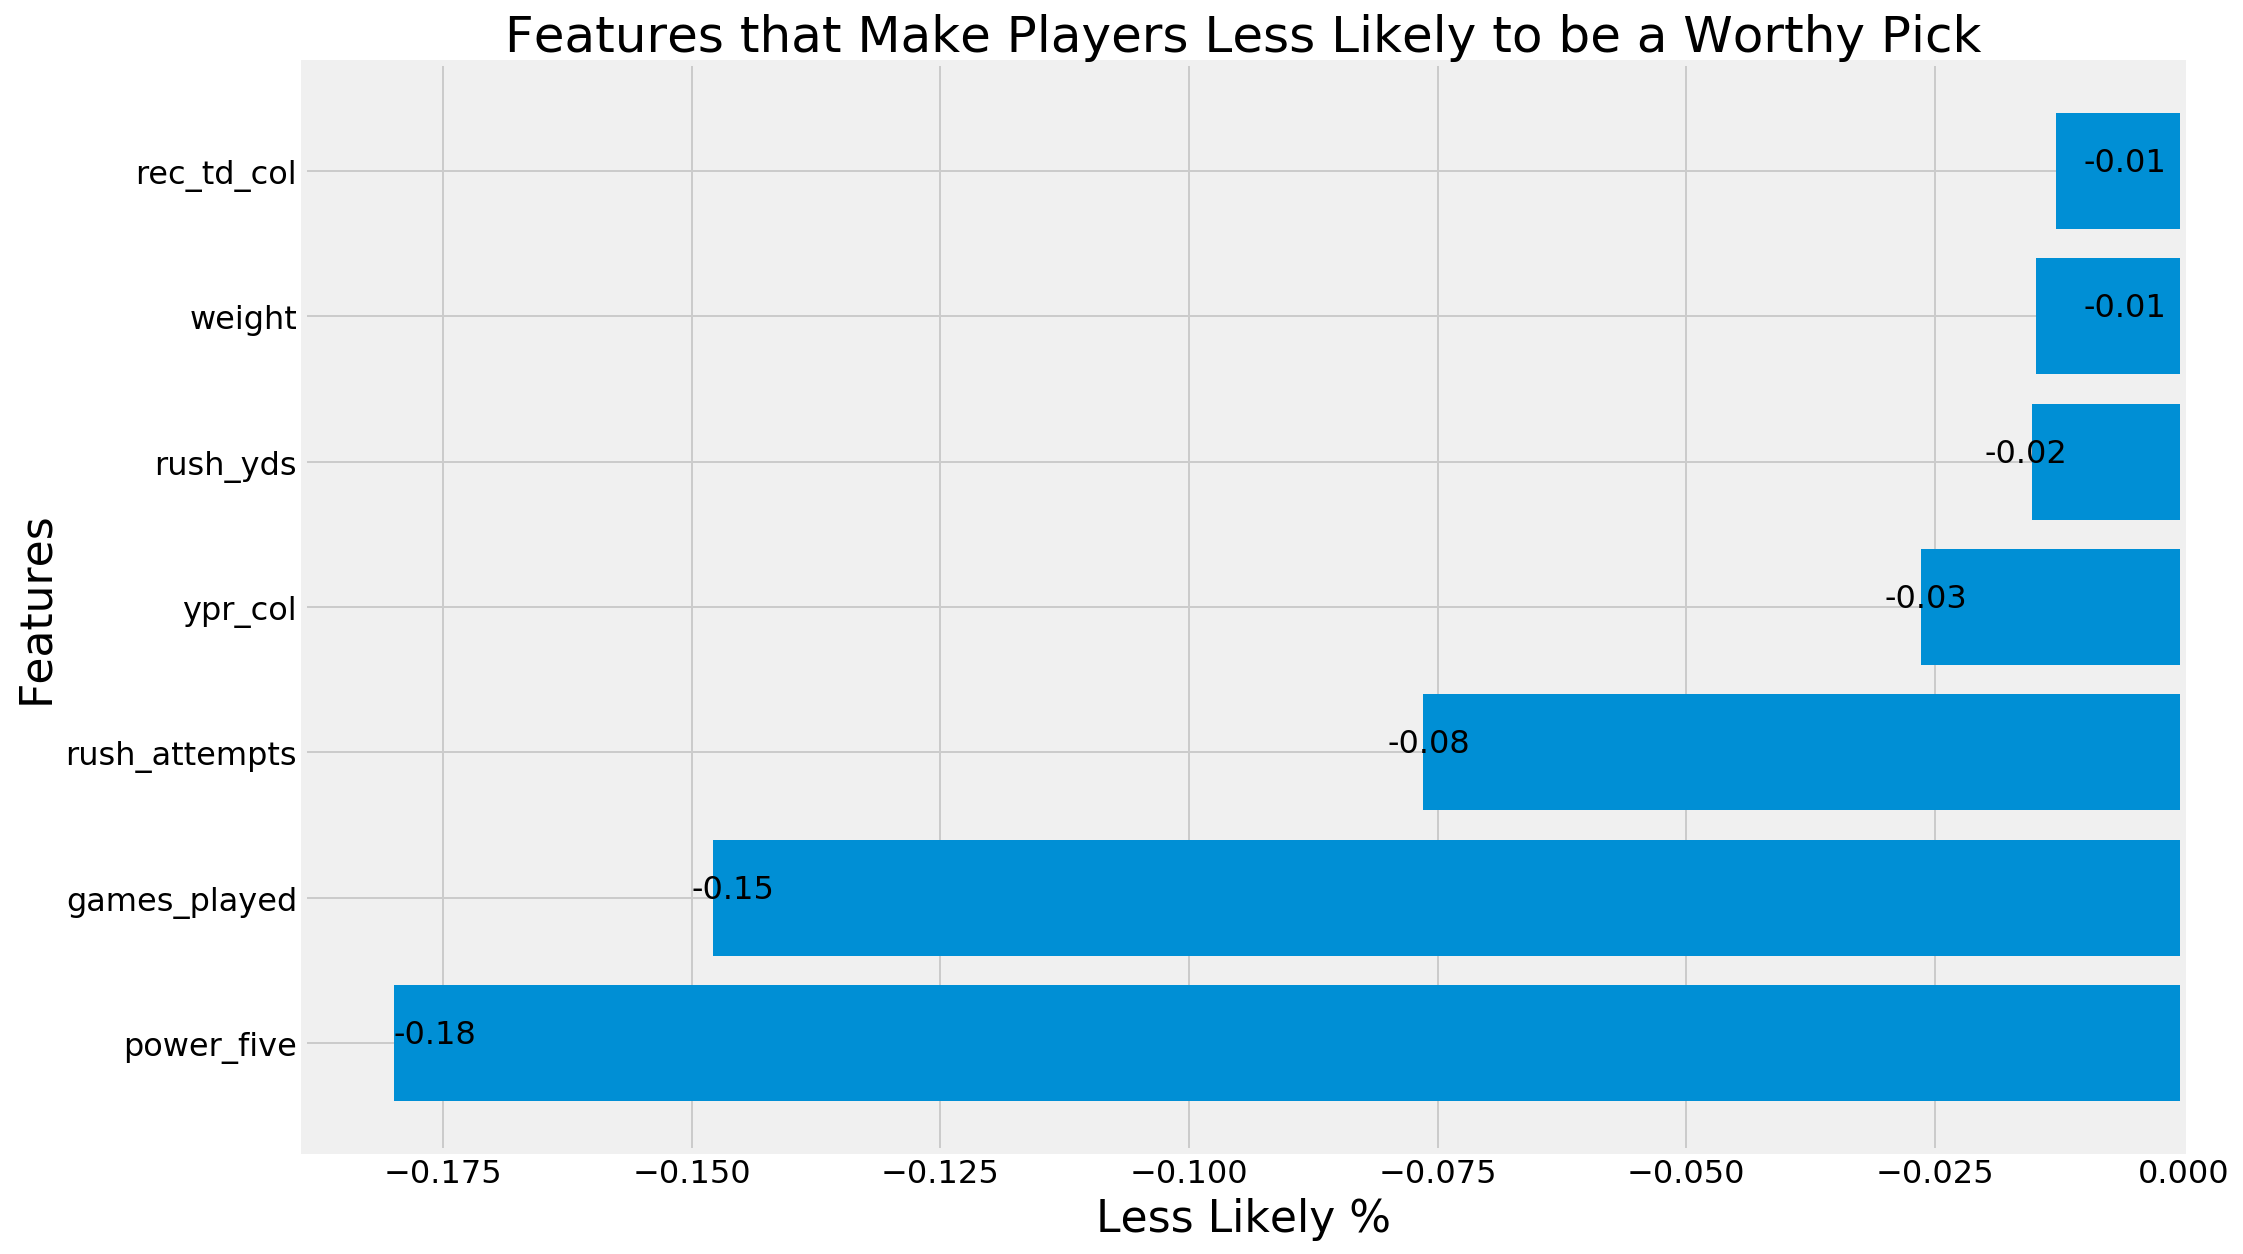

In [32]:
plt.figure(figsize=(15,10))
plt.barh(below_coef_df['features'],
        below_coef_df['exp_coef_weights'])
plt.ylabel('Features',fontsize=22)
plt.yticks(fontsize=16)
plt.xlabel('Less Likely %',fontsize=22)
plt.xticks(fontsize=16)
plt.title('Features that Make Players Less Likely to be a Worthy Pick', fontsize=25)
for index, value in enumerate(round(below_coef_df['exp_coef_weights'],2)):
    plt.text(value, index, str(value),fontsize=16)

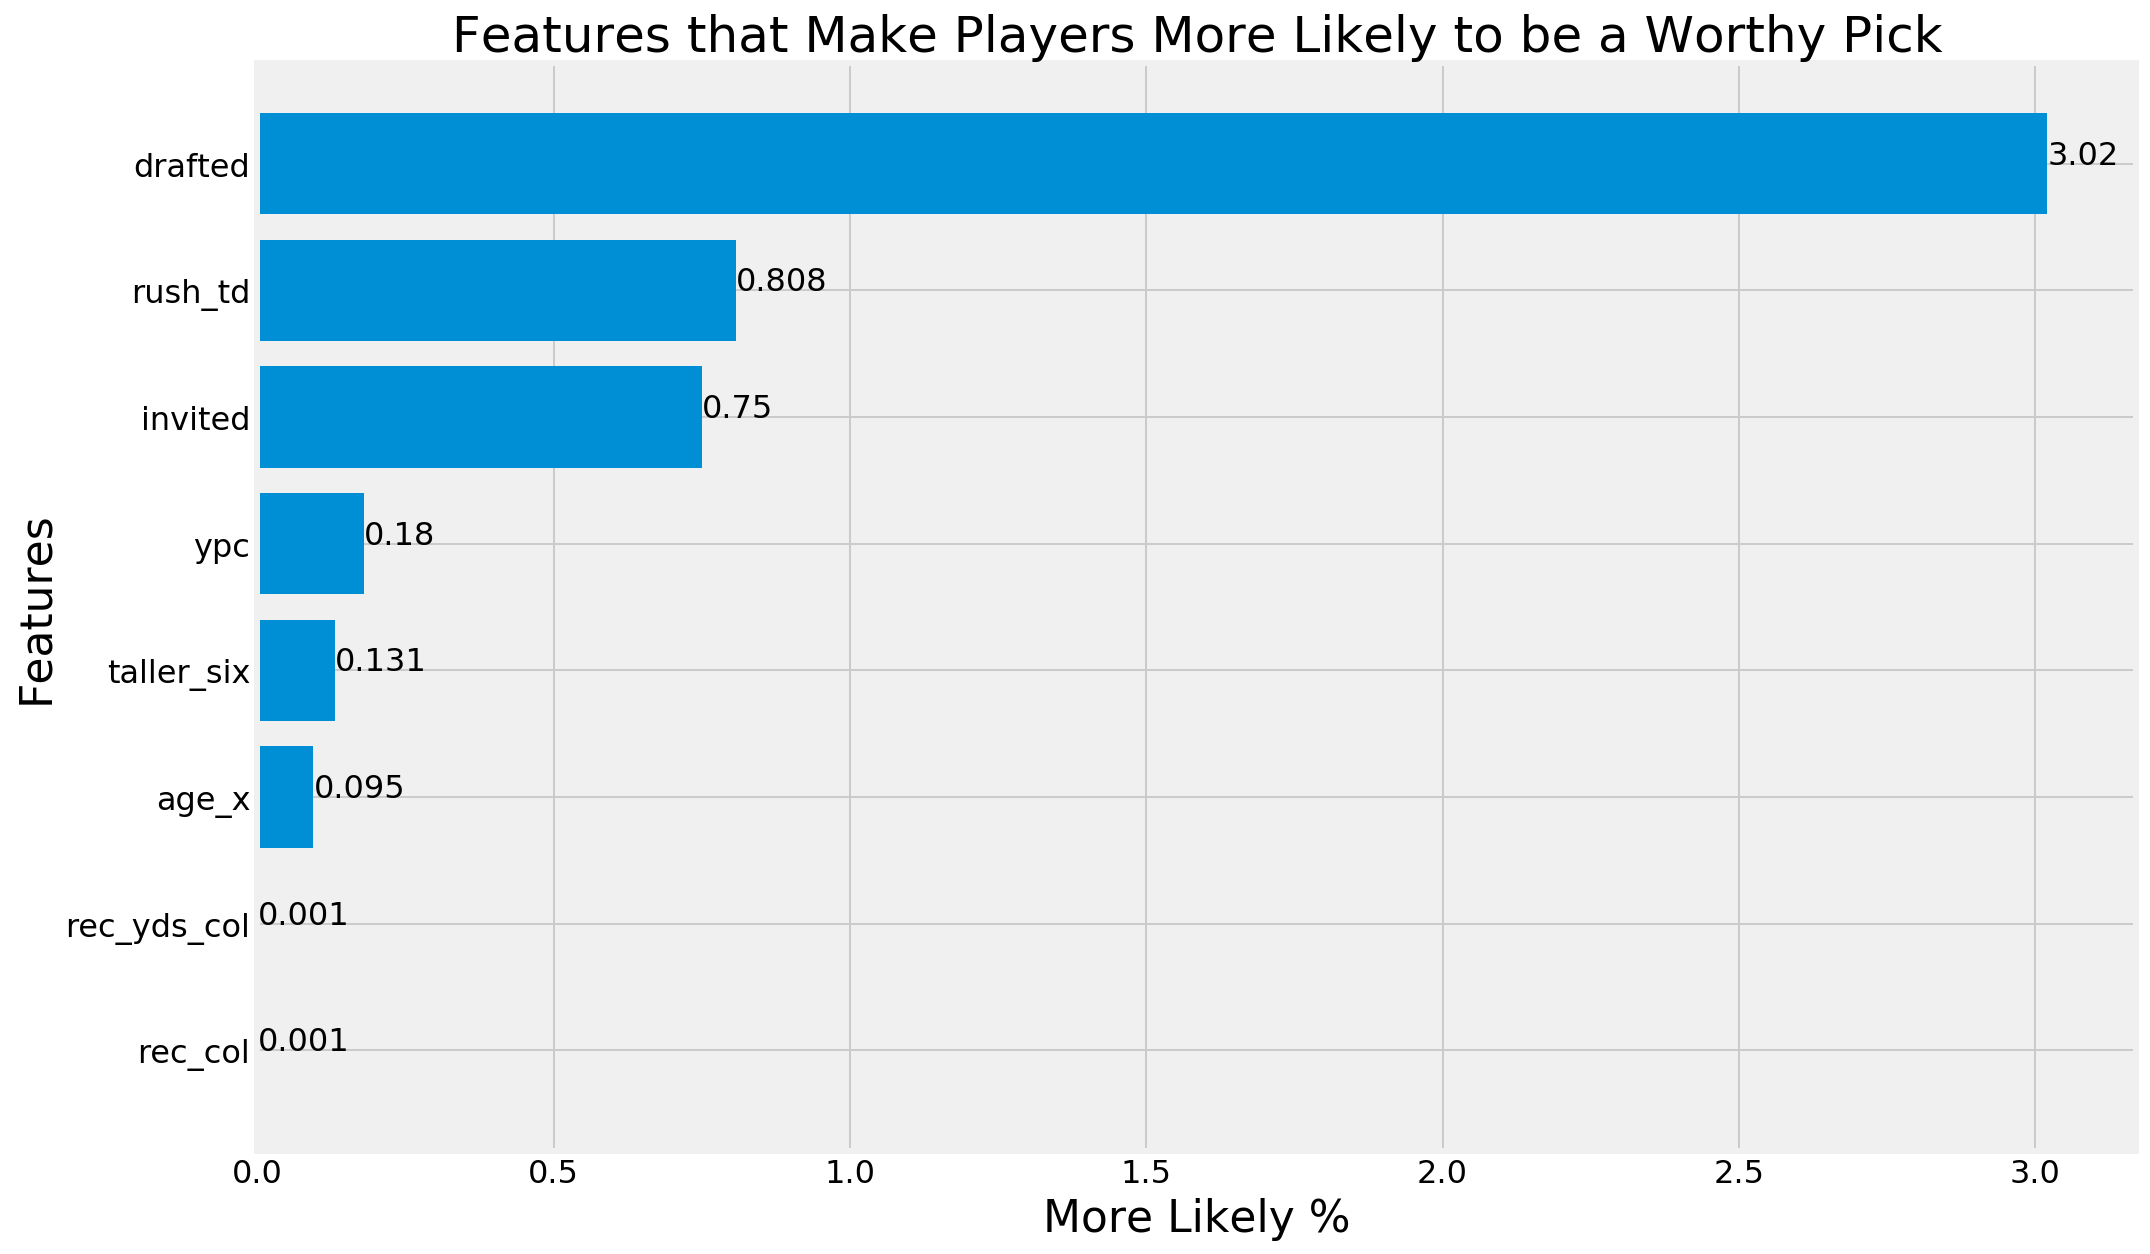

In [33]:
plt.figure(figsize=(15,10))
plt.barh(above_coef_df['features'],
        above_coef_df['exp_coef_weights'])
plt.ylabel('Features',fontsize=22)
plt.yticks(fontsize=16)
plt.xlabel('More Likely %',fontsize=22)
plt.xticks(fontsize=16)
plt.title('Features that Make Players More Likely to be a Worthy Pick', fontsize=25)
for index, value in enumerate(round(above_coef_df['exp_coef_weights'],3)):
    plt.text(value, index, str(value),fontsize=16)

need to do more to interpret coef. right now they are to the eth power

## KNN

In [34]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
print(knn.score(X_train_sc, y_train))
print(knn.score(X_test_sc, y_test))
cross_val_score(knn, X_train_sc, y_train, cv=5).mean()

0.6909090909090909
0.7894736842105263


0.6372727272727272

In [37]:
y_preds_train = knn.predict(X_train_sc)
y_preds_test = knn.predict(X_test_sc)

In [38]:
train_f1 = metrics.f1_score(y_train, y_preds_train)
test_f1 = metrics.f1_score(y_test, y_preds_test)
print(f'train:{train_f1}, test:{test_f1}')

train:0.2608695652173913, test:0.5


In [39]:
# tn, fp  positive = worth draft pick
# fn, tp  negative = not worth draft pick
confusion_matrix(y_test, # True values.
                 y_preds_test)  # Predicted values.

array([[13,  1],
       [ 3,  2]])

## Decision Tree

In [70]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [71]:
print(dt.score(X_train, y_train))
dt.score(X_test, y_test)

1.0


0.5263157894736842

In [42]:
y_preds_train = dt.predict(X_train)
y_preds_test = dt.predict(X_test)

In [43]:
train_f1 = metrics.f1_score(y_train, y_preds_train)
test_f1 = metrics.f1_score(y_test, y_preds_test)
print(f'train:{train_f1}, test:{test_f1}')

train:1.0, test:0.4


In [44]:
# tn, fp  positive = worth draft pick
# fn, tp  negative = not worth draft pick
confusion_matrix(y_test, # True values.
                 y_preds_test)  # Predicted values.

array([[7, 7],
       [2, 3]])

## BDT

In [94]:
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [95]:
print(bag.score(X_train, y_train))
bag.score(X_test, y_test)

0.9818181818181818


0.5263157894736842

In [47]:
y_preds_train = bag.predict(X_train)
y_preds_test = bag.predict(X_test)

In [48]:
train_f1 = metrics.f1_score(y_train, y_preds_train)
test_f1 = metrics.f1_score(y_test, y_preds_test)
print(f'train:{train_f1}, test:{test_f1}')

train:0.9032258064516129, test:0.0


In [49]:
# tn, fp  positive = worth draft pick
# fn, tp  negative = not worth draft pick
confusion_matrix(y_test, # True values.
                 y_preds_test)  # Predicted values.

array([[12,  2],
       [ 5,  0]])

## RF

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/Users/joshuakong/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.6324242424242424

In [52]:
y_preds_train = rf.predict(X_train)
y_preds_test = rf.predict(X_test)

In [53]:
train_f1 = metrics.f1_score(y_train, y_preds_train)
test_f1 = metrics.f1_score(y_test, y_preds_test)
print(f'train:{train_f1}, test:{test_f1}')

train:0.9696969696969697, test:0.33333333333333337


In [54]:
# tn, fp  positive = worth draft pick
# fn, tp  negative = not worth draft pick
confusion_matrix(y_test, # True values.
                 y_preds_test)  # Predicted values.

array([[14,  0],
       [ 4,  1]])

## AdaBoost

In [55]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_params = {
    'n_estimators': [50,100],
    'base_estimator__max_depth': [1,2],
    'learning_rate': [.9, 1.]
}
gs = GridSearchCV(ada, param_grid=ada_params, cv=3)
gs.fit(X_train, y_train)
gs.best_params_

/Users/joshuakong/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'base_estimator__max_depth': 1, 'learning_rate': 0.9, 'n_estimators': 100}

In [56]:
print(gs.best_score_)

0.6545454545454545


In [57]:
y_preds_train = gs.predict(X_train)
y_preds_test = gs.predict(X_test)

In [58]:
train_f1 = metrics.f1_score(y_train, y_preds_train)
test_f1 = metrics.f1_score(y_test, y_preds_test)
print(f'train:{train_f1}, test:{test_f1}')

train:1.0, test:0.1818181818181818


In [59]:
# tn, fp  positive = worth draft pick
# fn, tp  negative = not worth draft pick
confusion_matrix(y_test, # True values.
                 y_preds_test)  # Predicted values.

array([[9, 5],
       [4, 1]])

## SVC

In [96]:
svc = SVC(gamma='scale',random_state=42)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
print(svc.score(X_train, y_train))
svc.score(X_test, y_test)

0.6909090909090909


0.7368421052631579

In [62]:
y_preds_train = svc.predict(X_train)
y_preds_test = svc.predict(X_test)

In [63]:
train_f1 = metrics.f1_score(y_train, y_preds_train)
test_f1 = metrics.f1_score(y_test, y_preds_test)
print(f'train:{train_f1}, test:{test_f1}')

train:0.0, test:0.0


/Users/joshuakong/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
# tn, fp  positive = worth draft pick
# fn, tp  negative = not worth draft pick
confusion_matrix(y_test, # True values.
                 y_preds_test)  # Predicted values.

array([[14,  0],
       [ 5,  0]])